# SEATTLE'S VISION ZERO PLAN

<p style='text-align: justify;'>
While Seattle is one of the safest cities in United States of America, there are still more than 10,000 crashes per year, resulting in average of 20 people losing their lives and over 150 people sustaining life-changing injures.
<p style='text-align: justify;'>
Despite the downward trend of fatalities and serious injuries, Seattle's Vision Zero Plan takes extra steps to ensure its citizens' safety. Indeed, traffic collisions are not accidents; They are preventable through smarter street design, targeted enforcement and etc. To support Seattle's plan, this paper would like to predict the severity of accidents and recommend possible remedies to reduce or eliminate traffic deaths and serious injuries. 

## 1.0 PROBLEM STATEMENT

To predict the severity of an accident in Seattle.

## 2.0 LITERATURE REVIEW

<p style='text-align: justify;'>
Accident severity analysis has long been important topics for research and govenment. A study by Shankar, Mannering and Barfield (1996) employed a statistical model to provide a broad range of variables, including roadway geometry and weather-related conditions, as well as driver characteristics. Their estimation results provided valuable evidence on the effects that environmental conditions, highway design, accident type, driver characteristics, and vehicle attributes have on accident severity.
<p style='text-align: justify;'>
Among other things, they found that the driver’s age was a significant factor, with young drivers at greater risk of being involved in a casualty accident than older drivers. Other accident studies looked at severity types such as fatalities (Shibata and Fukuda, 1994) or crashes involving certain types of vehicles such as heavy trucks and combination vehicles (Alassar, 1988; Chirachavala, 1985). In a nut shell, the accident framework can be summarized as:

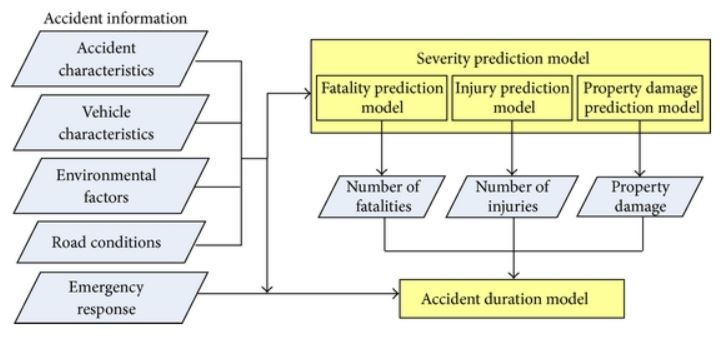

<p style='text-align: justify;'>
The accident framework above will serve as primary guide of this paper. Hence, this paper will consider the following dimensions as the potential causes of accident severity: </p>

- Accident characteristics
- Vehicle characteristics
- Environmental factors
- Road conditions
- Driver characteristics 

## 3.0 Methodology

## 3.0 DATA PROCESSING AND EXPLORATION

<p style='text-align: justify;'>
To reserve the consistency for the review process in Capsone Project, this paper uses the shared data that includes all collision types in Seattle from year 2003 until now.

### 3.1 Seattle Accident Data

In [1]:
# Import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# from random import uniform

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

#Option
pd.options.display.max_columns = None

In [2]:
# Load datasets
acd_raw = pd.read_csv(r'C:\Users\yikha\OneDrive\Documents\GitHub\Coursera_Capstone\Data\Data-Collisions.csv',
                  index_col = 'INCKEY',
                 dtype = {"INCKEY" : "object", "COLDETKEY" : "object", "REPORTNO" : "object",
                          "STATUS" : "object", "ADDRTYPE" : "object", "INTKEY" : "float64",
                          "LOCATION" : "object", "EXCEPTRSNCODE" : "object", "EXCEPTRSNDESC" : "object",
                          "SEVERITYCODE" : "object", "SEVERITYCODE.1" : "object",
                          "SEVERITYDESC": "object", "COLLISIONTYPE": "object",
                          "PERSONCOUNT": "int64", "PEDCOUNT": "int64", "PEDCYLCOUNT" : "int64", 
                          "VEHCOUNT" : "int64", "INCDATE" : "object", "INCDTTM" : "object",
                          "JUNCTIONTYPE" : "object", "SDOT_COLCODE" : "object", "SDOT_COLDESC" : "object",
                          "INATTENTIONIND" : "object", "UNDERINFL" : "object","WEATHER" : "object",
                          "ROADCOND" : "object", "LIGHTCOND" : "object", "PREDROWNOTGRNT" : "object",
                          "SDOTCOLNUM" : "object", "SPEEDING" : "object","ST_COLCODE" : "object", 
                          "ST_COLDESC" : "object", "SEGLANEKEY" : "object", "CROSSWALKKEY" : "object",
                          "HITPARKEDCAR" : "object"
                         })

acd_raw.head(5)

,SEVERITYCODE,X,Y,OBJECTID,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
INCKEY,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1307,2,-122.323148,47.703140,1,1307,3502005,Matched,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,,NaN,2,Injury Collision,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
52200,1,-122.347294,47.647172,2,52200,2607959,Matched,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,NaN,NaN,1,Property Damage Only Collision,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0,Raining,Wet,Dark - Street Lights On,NaN,6354039,NaN,11,From same direction - both going straight - bo...,0,0,N
26700,1,-122.334540,47.607871,3,26700,1482393,Matched,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,NaN,NaN,1,Property Damage Only Collision,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Overcast,Dry,Daylight,NaN,4323031,NaN,32,One parked--one moving,0,0,N
1144,1,-122.334803,47.604803,4,1144,3503937,Matched,Block,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,,NaN,1,Property Damage Only Collision,Other,3,0,0,3,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
17700,2,-122.306426,47.545739,5,17700,1807429,Matched,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,NaN,NaN,2,Injury Collision,Angles,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Daylight,NaN,4028032,NaN,10,Entering at angle,0,0,N


In [3]:
# Keep target variable and potential attributes
acd = acd_raw[['ADDRTYPE','SEVERITYCODE','COLLISIONTYPE',
            'INCDTTM','JUNCTIONTYPE','INATTENTIONIND',
            'UNDERINFL','WEATHER','ROADCOND','LIGHTCOND',
            'PEDROWNOTGRNT','SPEEDING','HITPARKEDCAR','SDOT_COLCODE',
            'SDOT_COLDESC']]
acd.head(5)

,ADDRTYPE,SEVERITYCODE,COLLISIONTYPE,INCDTTM,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR,SDOT_COLCODE,SDOT_COLDESC
INCKEY,,,,,,,,,,,,,,,
1307,Intersection,2,Angles,3/27/2013 2:54:00 PM,At Intersection (intersection related),NaN,N,Overcast,Wet,Daylight,NaN,NaN,N,11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ..."
52200,Block,1,Sideswipe,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),NaN,0,Raining,Wet,Dark - Street Lights On,NaN,NaN,N,16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ..."
26700,Block,1,Parked Car,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),NaN,0,Overcast,Dry,Daylight,NaN,NaN,N,14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END"
1144,Block,1,Other,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),NaN,N,Clear,Dry,Daylight,NaN,NaN,N,11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ..."
17700,Intersection,2,Angles,1/28/2004 8:04:00 AM,At Intersection (intersection related),NaN,0,Raining,Wet,Daylight,NaN,NaN,N,11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ..."


In [4]:
# Check whether there are duplicate records
chkuniqueid = acd_raw.index.duplicated(keep=False)
np.unique(chkuniqueid, return_counts=True)

(array([False]), array([194673], dtype=int64))

### 3.2 Data Cleansing

In [5]:
#Treat date
acd['INCDTTM'] = pd.to_datetime(acd['INCDTTM'])

C:\Users\yikha\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [6]:
# Generate frequency table for categorical variables
char = acd.select_dtypes(include=['object']).columns

for i in char:
    x = acd[i].value_counts(dropna=False)
    print(x,'\n')

Block           126926
Intersection     65070
NaN               1926
Alley              751
Name: ADDRTYPE, dtype: int64 

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64 

Parked Car    47987
Angles        34674
Rear Ended    34090
Other         23703
Sideswipe     18609
Left Turn     13703
Pedestrian     6608
Cycles         5415
NaN            4904
Right Turn     2956
Head On        2024
Name: COLLISIONTYPE, dtype: int64 

Mid-Block (not related to intersection)              89800
At Intersection (intersection related)               62810
Mid-Block (but intersection related)                 22790
Driveway Junction                                    10671
NaN                                                   6329
At Intersection (but not related to intersection)     2098
Ramp Junction                                          166
Unknown                                                  9
Name: JUNCTIONTYPE, dtype: int64 

NaN    164868
Y       29805
Name: INATTENTIONIND, dtype

In [7]:
# Further investigate the input values of 'Underinfluence' variable
pd.crosstab(acd['SEVERITYCODE'],acd['UNDERINFL'],normalize='columns')

UNDERINFL,0,1,N,Y
SEVERITYCODE,,,,
1,0.717628,0.593742,0.691884,0.621732
2,0.282372,0.406258,0.308116,0.378268


Since 0 and 1 have the similar distribution as N and Y respectively, 0 and 1 may indicates N and Y respectively.

In [8]:
#Treat Data values
acd['INATTENTIONIND'].fillna('N',inplace=True)
acd['PEDROWNOTGRNT'].fillna('N',inplace=True)
acd['SPEEDING'].fillna('N',inplace=True)
acd['UNDERINFL'].replace(['0','1'],['N','Y'],inplace=True)

C:\Users\yikha\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\Users\yikha\anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [9]:
for i in char:
    x = acd[i].value_counts(dropna=False)
    print(x,'\n')

Block           126926
Intersection     65070
NaN               1926
Alley              751
Name: ADDRTYPE, dtype: int64 

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64 

Parked Car    47987
Angles        34674
Rear Ended    34090
Other         23703
Sideswipe     18609
Left Turn     13703
Pedestrian     6608
Cycles         5415
NaN            4904
Right Turn     2956
Head On        2024
Name: COLLISIONTYPE, dtype: int64 

Mid-Block (not related to intersection)              89800
At Intersection (intersection related)               62810
Mid-Block (but intersection related)                 22790
Driveway Junction                                    10671
NaN                                                   6329
At Intersection (but not related to intersection)     2098
Ramp Junction                                          166
Unknown                                                  9
Name: JUNCTIONTYPE, dtype: int64 

N    164868
Y     29805
Name: INATTENTIONIND, dtype: in

### 3.3 Feature Engineering

In [10]:
# Derive Weekend variable
acd['WEEKEND'] = (pd.to_datetime(acd['INCDTTM']).dt.dayofweek + 1)/6
acd['WEEKEND'] = acd['WEEKEND'].apply(np.floor)
acd = acd.drop(columns=['INCDTTM'])

C:\Users\yikha\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\yikha\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
# Derive vechile involved in accidents
acd['VEHICLE_INVOL'] = acd['SDOT_COLCODE'].apply(lambda x: 'MOTOR_VEH' if x[0] in ['1','2'] 
                                                  else ('DRIVERLESS' if x[0] in ['3','4'] 
                                                        else ('PEDALCYCLIST' if x[0] in ['5','6'] 
                                                              else ('PEDESTRIAN' if x[0] in ['7','8'] 
                                                                    else 'NOT ENOUGH INFORMATION / NOT APPLICABLE'))))
acd = acd.drop(columns=['SDOT_COLCODE','SDOT_COLDESC'])

### 3.4 Treatment of Missing Data

<p style='text-align: left;'>
Procedures to examine the missing data: </p>
<ol>
<li>Examine wheter any rows or columns are all missing
<li>Examine whether any rows or columns pose high proportion of missing values
<li>For simplicity, complete case deletion approach may be considered given that the impact on class distribution is negligible
<ol>

In [12]:
# drop any all rows or columns that are all null values 
acd.dropna(axis='columns',how='all')
acd.dropna(axis='rows',how='all')

#Investigate whether there are any attributes pose high missing values
char = acd.select_dtypes(include=['object']).columns

for i in char:
    miss = acd[i].isnull().sum()
    print('Proportion of missing values for {} is {:.2f}% of total accident cases)'.format(i,miss/acd.shape[0]))

Proportion of missing values for ADDRTYPE is 0.01% of total accident cases)
Proportion of missing values for SEVERITYCODE is 0.00% of total accident cases)
Proportion of missing values for COLLISIONTYPE is 0.03% of total accident cases)
Proportion of missing values for JUNCTIONTYPE is 0.03% of total accident cases)
Proportion of missing values for INATTENTIONIND is 0.00% of total accident cases)
Proportion of missing values for UNDERINFL is 0.03% of total accident cases)
Proportion of missing values for WEATHER is 0.03% of total accident cases)
Proportion of missing values for ROADCOND is 0.03% of total accident cases)
Proportion of missing values for LIGHTCOND is 0.03% of total accident cases)
Proportion of missing values for PEDROWNOTGRNT is 0.00% of total accident cases)
Proportion of missing values for SPEEDING is 0.00% of total accident cases)
Proportion of missing values for HITPARKEDCAR is 0.00% of total accident cases)
Proportion of missing values for VEHICLE_INVOL is 0.00% of 

All attributes has less than 1% of missing values. 

In [13]:
# Investigate the impact of complete case deletion approach on class distribution

print('Before excluding missing values')
print('Number of observation = ',acd.shape[0],'\n')
print(acd['SEVERITYCODE'].value_counts(),'\n')
print(acd['SEVERITYCODE'].value_counts(normalize=True),'\n')

print('After excluding missing values')
acd_temp = acd[acd.isnull().sum(axis='columns')==0]
print('Number of observation = ',acd_temp.shape[0],'\n')
print('which is ',acd_temp.shape[0]/acd.shape[0]*100,'% of original observation')
print(acd_temp['SEVERITYCODE'].value_counts(),'\n')
print(acd_temp['SEVERITYCODE'].value_counts(normalize=True))

Before excluding missing values
Number of observation =  194673 

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64 

1    0.701099
2    0.298901
Name: SEVERITYCODE, dtype: float64 

After excluding missing values
Number of observation =  182895 

which is  93.94985437117627 % of original observation
1    126270
2     56625
Name: SEVERITYCODE, dtype: int64 

1    0.690396
2    0.309604
Name: SEVERITYCODE, dtype: float64


Complete case deletion approach does not distrupt the class distribution. Thus, for simplicity, complete case deletion approach is used.

In [14]:
acd_clean = acd[acd.isnull().sum(axis='columns')==0]
acd_clean.head(5)

,ADDRTYPE,SEVERITYCODE,COLLISIONTYPE,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR,WEEKEND,VEHICLE_INVOL
INCKEY,,,,,,,,,,,,,,
1307,Intersection,2,Angles,At Intersection (intersection related),N,N,Overcast,Wet,Daylight,N,N,N,0.0,MOTOR_VEH
52200,Block,1,Sideswipe,Mid-Block (not related to intersection),N,N,Raining,Wet,Dark - Street Lights On,N,N,N,0.0,MOTOR_VEH
26700,Block,1,Parked Car,Mid-Block (not related to intersection),N,N,Overcast,Dry,Daylight,N,N,N,0.0,MOTOR_VEH
1144,Block,1,Other,Mid-Block (not related to intersection),N,N,Clear,Dry,Daylight,N,N,N,0.0,MOTOR_VEH
17700,Intersection,2,Angles,At Intersection (intersection related),N,N,Raining,Wet,Daylight,N,N,N,0.0,MOTOR_VEH


In [15]:
char = acd_clean.select_dtypes(include=['object']).columns

for i in char:
    x = acd_clean[i].value_counts(dropna=False)
    print(x,'\n')

Block           119362
Intersection     63298
Alley              235
Name: ADDRTYPE, dtype: int64 

1    126270
2     56625
Name: SEVERITYCODE, dtype: int64 

Parked Car    43119
Angles        34453
Rear Ended    33641
Other         22960
Sideswipe     18285
Left Turn     13637
Pedestrian     6513
Cycles         5362
Right Turn     2929
Head On        1996
Name: COLLISIONTYPE, dtype: int64 

Mid-Block (not related to intersection)              86609
At Intersection (intersection related)               61206
Mid-Block (but intersection related)                 22341
Driveway Junction                                    10519
At Intersection (but not related to intersection)     2055
Ramp Junction                                          160
Unknown                                                  5
Name: JUNCTIONTYPE, dtype: int64 

N    153687
Y     29208
Name: INATTENTIONIND, dtype: int64 

N    173898
Y      8997
Name: UNDERINFL, dtype: int64 

Clear                       109059
Raini

### 3.5 Data Exploratory Analysis

In [16]:
#Examine whether there are class imbalanced issue
prop, injury = acd_clean['SEVERITYCODE'].value_counts()
total = prop + injury
print('Total: {}\nInjury: {} ({:.2f}% of total)'.format(total,injury,100*injury/total))

Total: 182895
Injury: 56625 (30.96% of total)


The data has imbalanced class. Oversampling will be used. 

In [17]:
#Redefine the y variable into injury and non-injury
acd_clean_y = pd.to_numeric(acd_clean['SEVERITYCODE']).sub(1).astype('bool')

In [18]:
#Apply one hot endcoder to X variables
acd_clean_x = pd.get_dummies(acd_clean.drop(columns=['SEVERITYCODE']),drop_first=True)
acd_clean2 = pd.merge(acd_clean_y, acd_clean_x, left_index=True, right_index=True)
acd_clean2.head()

,SEVERITYCODE,WEEKEND,ADDRTYPE_Block,ADDRTYPE_Intersection,COLLISIONTYPE_Cycles,COLLISIONTYPE_Head On,COLLISIONTYPE_Left Turn,COLLISIONTYPE_Other,COLLISIONTYPE_Parked Car,COLLISIONTYPE_Pedestrian,COLLISIONTYPE_Rear Ended,COLLISIONTYPE_Right Turn,COLLISIONTYPE_Sideswipe,JUNCTIONTYPE_At Intersection (intersection related),JUNCTIONTYPE_Driveway Junction,JUNCTIONTYPE_Mid-Block (but intersection related),JUNCTIONTYPE_Mid-Block (not related to intersection),JUNCTIONTYPE_Ramp Junction,JUNCTIONTYPE_Unknown,INATTENTIONIND_Y,UNDERINFL_Y,WEATHER_Clear,WEATHER_Fog/Smog/Smoke,WEATHER_Other,WEATHER_Overcast,WEATHER_Partly Cloudy,WEATHER_Raining,WEATHER_Severe Crosswind,WEATHER_Sleet/Hail/Freezing Rain,WEATHER_Snowing,WEATHER_Unknown,ROADCOND_Ice,ROADCOND_Oil,ROADCOND_Other,ROADCOND_Sand/Mud/Dirt,ROADCOND_Snow/Slush,ROADCOND_Standing Water,ROADCOND_Unknown,ROADCOND_Wet,LIGHTCOND_Dark - Street Lights Off,LIGHTCOND_Dark - Street Lights On,LIGHTCOND_Dark - Unknown Lighting,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk,LIGHTCOND_Other,LIGHTCOND_Unknown,PEDROWNOTGRNT_Y,SPEEDING_Y,HITPARKEDCAR_Y,VEHICLE_INVOL_MOTOR_VEH,VEHICLE_INVOL_NOT ENOUGH INFORMATION / NOT APPLICABLE,VEHICLE_INVOL_PEDALCYCLIST
INCKEY,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1307,True,0.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
52200,False,0.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0
26700,False,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
1144,False,0.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
17700,True,0.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0


</p>Split the dataset into train, validation and test sets.</p>

- train set - is used to train the model
- validation set - is used to evaluate the loss and any metrics during model fitting
- test set is - unused during training phase and used to evaluate how well the model generalize to new data at the end.


In [19]:
#Split into train, validation and test sets
train_df, test_df = train_test_split(acd_clean2, test_size=0.2, random_state=4)
train_df, valid_df = train_test_split(train_df, test_size=0.25, random_state=4)

y_train = np.array(train_df['SEVERITYCODE'])
y_train_bool = y_train != 0
y_valid = np.array(valid_df['SEVERITYCODE'])
y_test = np.array(test_df['SEVERITYCODE'])

x_train = np.array(train_df.drop(columns=['SEVERITYCODE']))
x_valid = np.array(valid_df.drop(columns=['SEVERITYCODE']))
x_test = np.array(test_df.drop(columns=['SEVERITYCODE']))

print('The current shape of the Seattle accident data is ',acd_clean2.shape)
print('Train set:', x_train.shape,  y_train.shape)
print('Validation set:', x_valid.shape,  y_valid.shape)
print('Test set:', x_test.shape,  y_test.shape)

The current shape of the Seattle accident data is  (182895, 53)
Train set: (109737, 52) (109737,)
Validation set: (36579, 52) (36579,)
Test set: (36579, 52) (36579,)


C:\Users\yikha\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


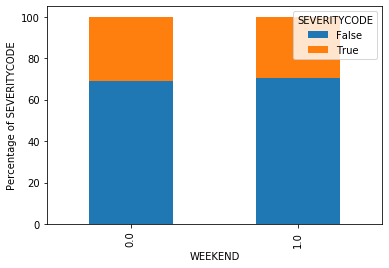

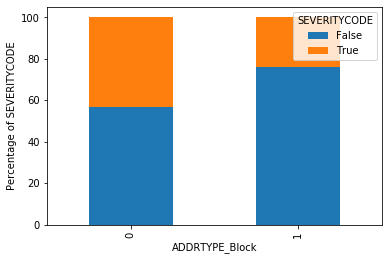

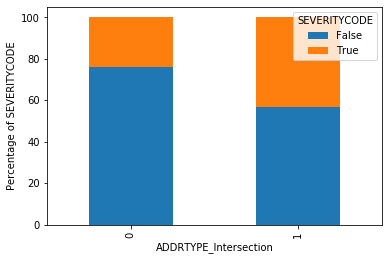

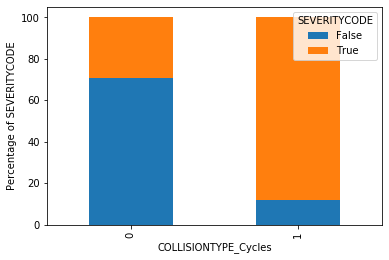

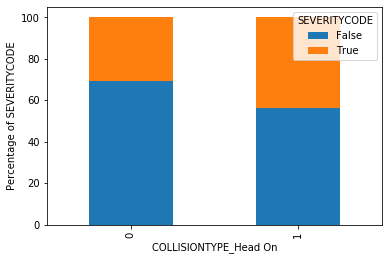

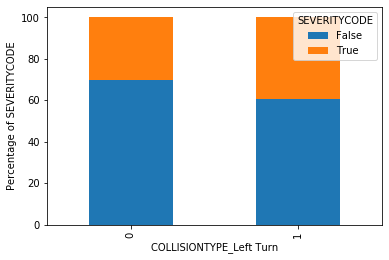

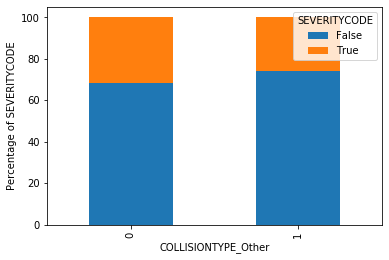

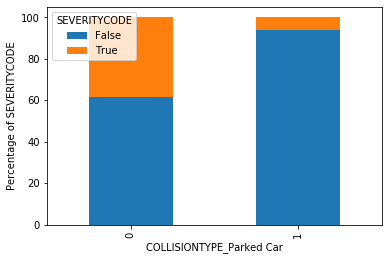

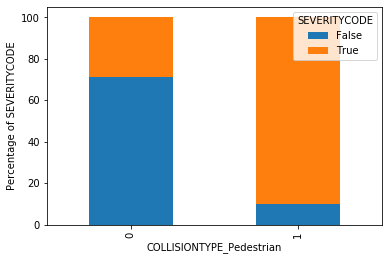

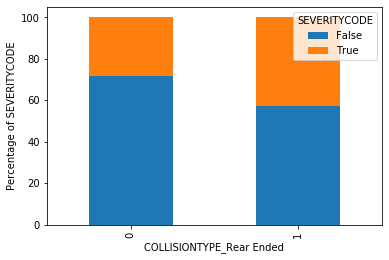

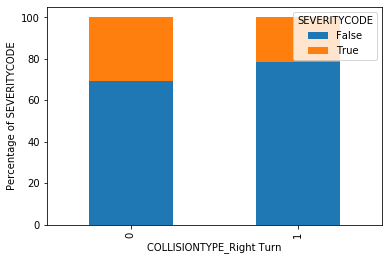

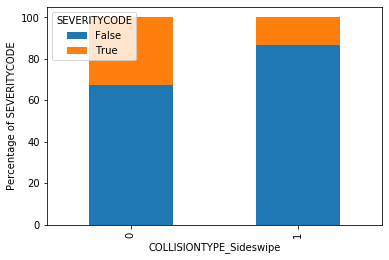

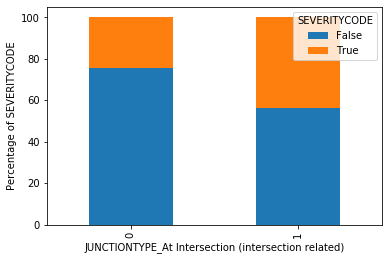

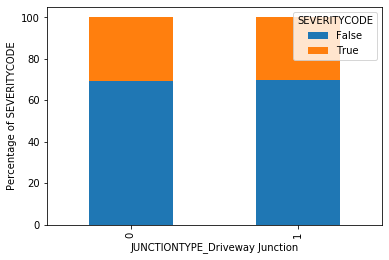

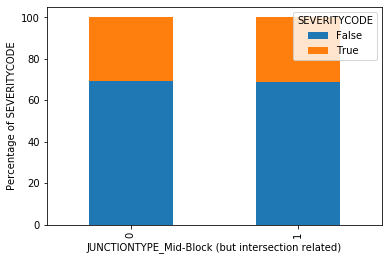

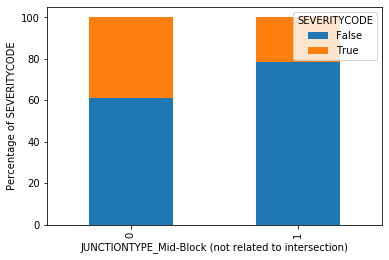

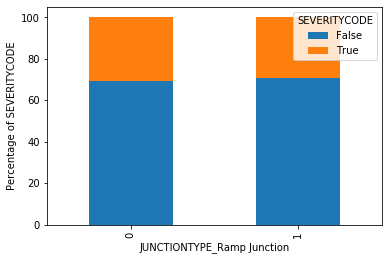

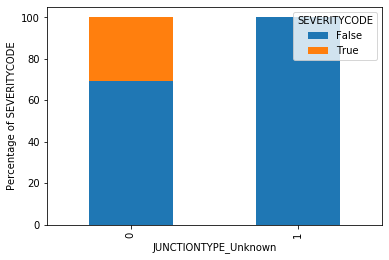

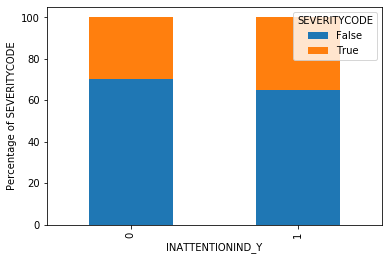

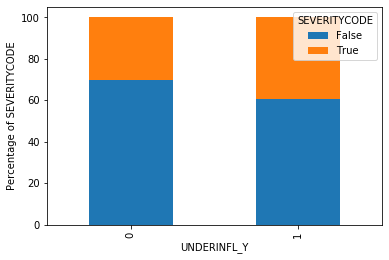

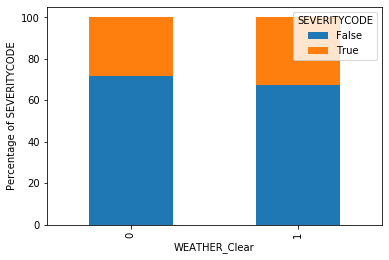

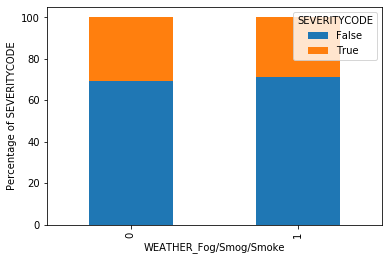

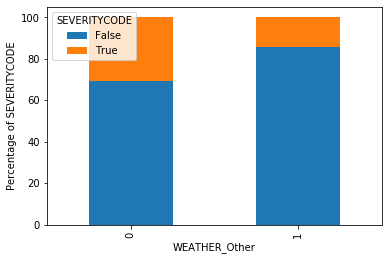

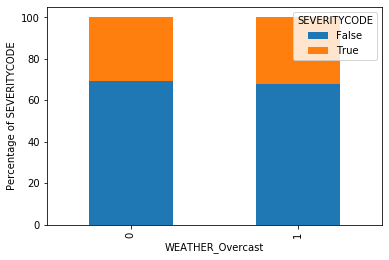

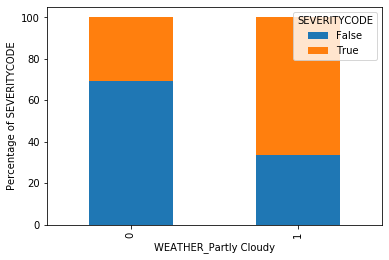

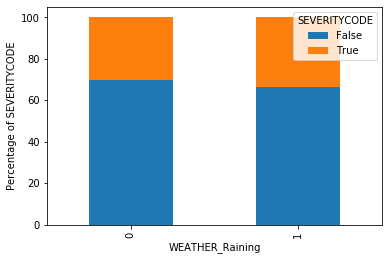

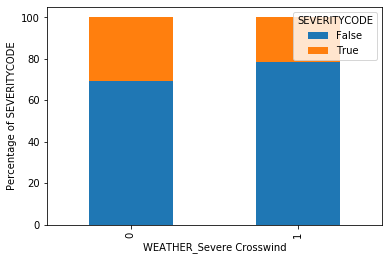

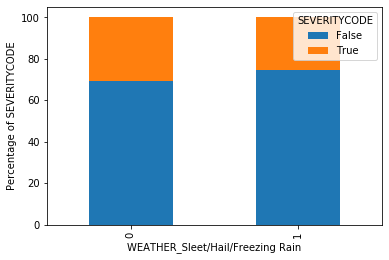

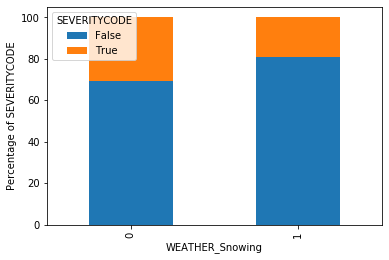

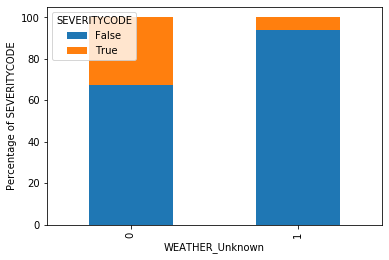

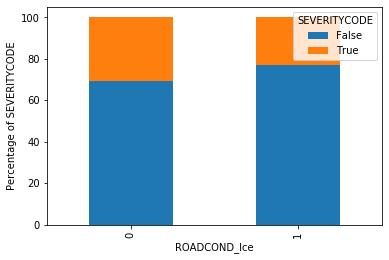

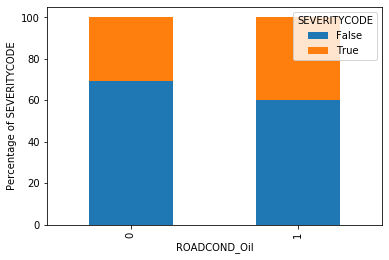

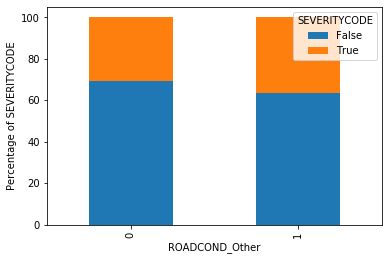

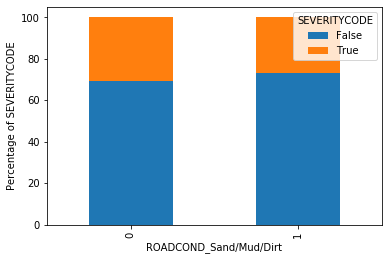

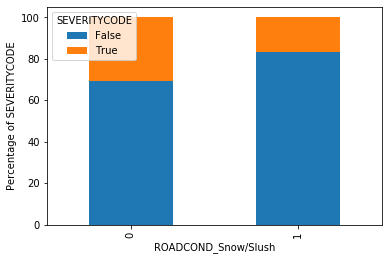

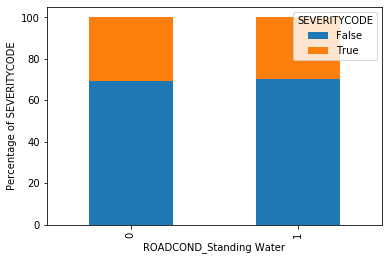

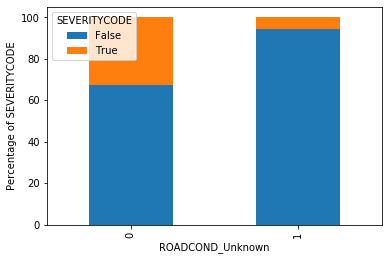

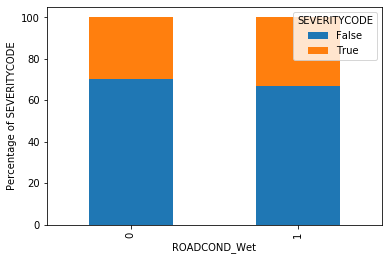

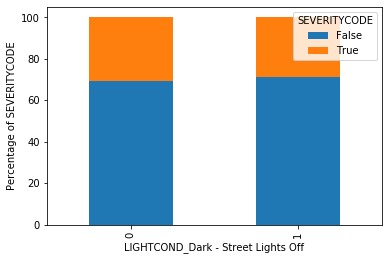

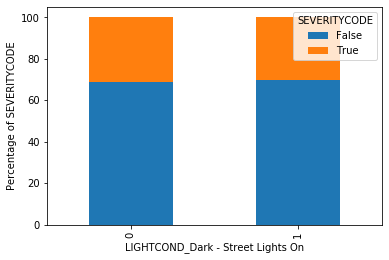

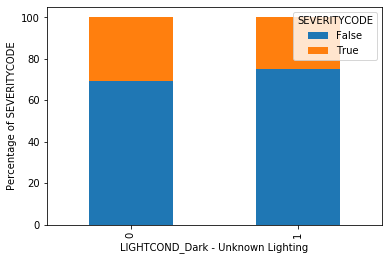

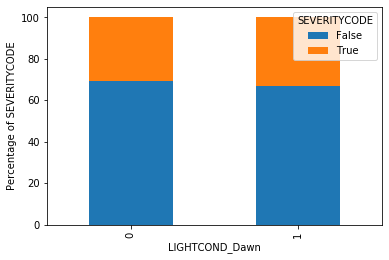

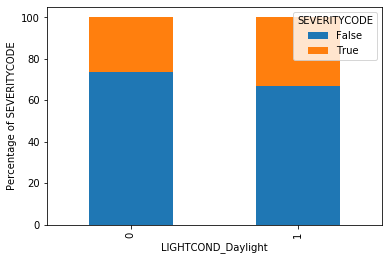

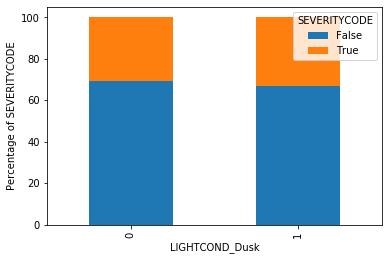

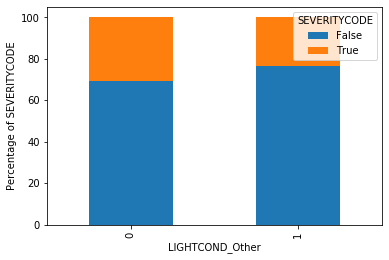

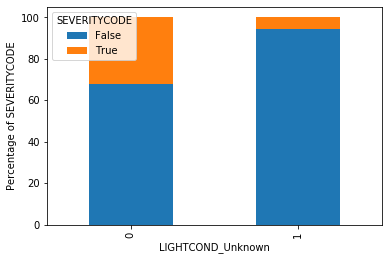

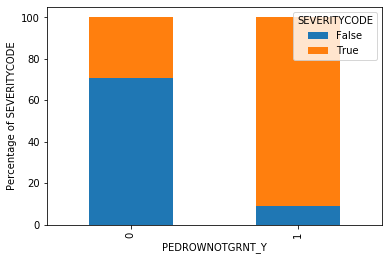

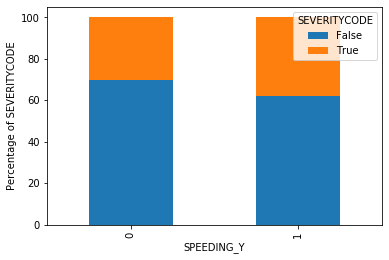

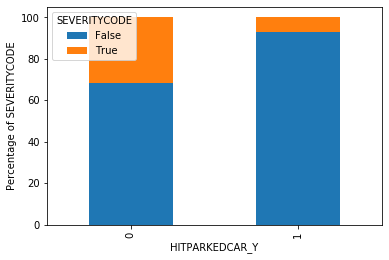

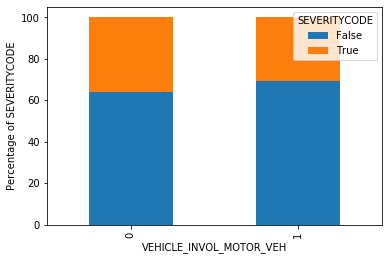

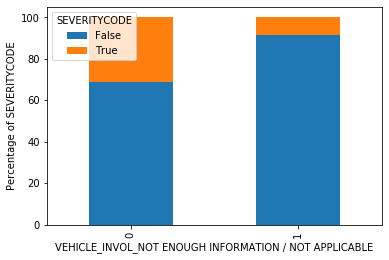

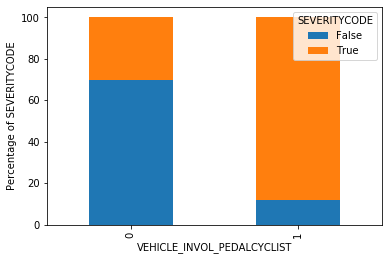

In [20]:
char = train_df.drop(columns=['SEVERITYCODE']).columns

for i in char:
    freqtable = pd.crosstab(train_df[i],train_df['SEVERITYCODE'])
    freqtable = freqtable.apply(lambda x: x/sum(x)*100,axis=1)
    freqtable.plot(kind='bar',stacked=True)
    plt.xlabel(i)
    plt.ylabel('Percentage of SEVERITYCODE')

### 3.6 Oversampling

In [21]:
x_injury = x_train[y_train_bool]
x_xinjury = x_train[~y_train_bool]

y_injury = y_train[y_train_bool]
y_xinjury = y_train[~y_train_bool]

print(x_injury.shape)
print(x_xinjury.shape)
print(y_injury.shape)
print(y_xinjury.shape)

(33739, 52)
(75998, 52)
(33739,)
(75998,)


In [22]:
ids = np.arange(len(x_injury))
choices = np.random.choice(ids, len(x_xinjury))

x_injury_rsmpl = x_injury[choices]
y_injury_rsmpl = y_injury[choices]
x_injury_rsmpl.shape

(75998, 52)

In [23]:
x_train_rsmpl = np.concatenate([x_injury_rsmpl, x_xinjury], axis=0)
y_train_rsmpl = np. concatenate([y_injury_rsmpl, y_xinjury], axis = 0)

order = np.arange(len(y_train_rsmpl))
np.random.shuffle(order)
x_train_rsmpl = x_train_rsmpl[order]
y_train_rsmpl = y_train_rsmpl[order]

print('The shape of resampled Training set on X variables is', x_train_rsmpl.shape)
print('The shape of resampled Training set on Y variables is', y_train_rsmpl.shape)

The shape of resampled Training set on X variables is (151996, 52)
The shape of resampled Training set on Y variables is (151996,)


In [24]:
#Examine class distribution after treatment
injury = y_injury_rsmpl.size
xinjury = y_injury_rsmpl.size
total = injury + xinjury
print('Total: {}\nInjury: {} ({:.2f}% of total)'.format(total,injury,100*injury/total))

Total: 151996
Injury: 75998 (50.00% of total)


## 4.0 MODELLING

This paper will use the following alogrithm to build the classifier:
- K nearest Neighbour (KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression

## 4.1 K Nearest Neighbour (KNN)

In [ ]:
# Caculate accuracy of KNN  for different k
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Initialize parameter, mean and standard deviation
K = 10
auc_knn_train = np.zeros(K)
auc_knn_valid = np.zeros(K)

for k in range(1,K + 1):
    knn = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
    yhat_knn_train = knn.predict(x_train)
    yhat_knn_valid = knn.predict(x_valid)
    auc_knn_train[k - 1] = metrics.roc_auc_score(y_train, yhat_knn_train)
    auc_knn_valid[k - 1] = metrics.roc_auc_score(y_valid, yhat_knn_valid)

In [45]:
k = 1
auc_knn_train[k - 1] = metrics.roc_auc_score(y_train, yhat_knn_train)
auc_knn_valid[k - 1] = metrics.roc_auc_score(y_valid, yhat_knn_valid)

In [47]:
auc_knn_valid

array([0.60890195, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [ ]:
plt.clf()
plt.plot(np.arange(1,K+1,1),auc_knn_train,color=colors[0],label='Train')
plt.plot(np.arange(1,K+1,1),auc_knn_valid,color=colors[0],linestyle='--',label='Val')
plt.xticks(np.arange(0, K + 1, 1))
plt.ylabel('AUC')
plt.xlabel('Number of neighbours (K)')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
print("The best AUC was with", auc_knn_valid.max(), "with k =", mean_knn.argmax()+1) 

## 4.2 Decision Tree

In [ ]:
# Caculate accuracy of Decision Tree for different depth
from sklearn.tree import DecisionTreeClassifier

# Initialize parameter, mean and standard deviation
depth = 10
auc_tree_train = np.empty(depth)
auc_tree_valid = np.empty(depth)

for i in range(1,depth + 1):
    tree = DecisionTreeClassifier(criterion="entropy", max_depth = i).fit(x_train,y_train)
    yhat_tree_train = tree.predict(x_train)
    yhat_tree_valid = tree.predict(x_valid)
    mean_tree_train[i - 1] = metrics.roc_auc_score(y_train, yhat_tree_train)
    mean_tree_valid[i - 1] = metrics.roc_auc_score(y_valid, yhat_tree_valid)

In [ ]:
# Caculate accuracy of Decision Tree for different depth
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# Initialize parameter, mean and standard deviation
depth = 10
mean_tree = np.zeros(depth)
std_tree = np.zeros(depth)

for i in range(1,depth + 1):
    tree = DecisionTreeClassifier(criterion="entropy", max_depth = i).fit(x_train,y_train)
    yhat_tree = tree.predict(x_valid)
    mean_tree[i - 1] = metrics.accuracy_score(y_valid, yhat_tree)
    std_tree[i - 1] = np.std(yhat_tree==y_valid)/np.sqrt(yhat_tree.shape[0])

print(mean_tree)
print(std_tree)

In [ ]:
plt.clf()
plt.plot(np.arange(1, depth + 1, 1),mean_tree,'g')
plt.fill_between(np.arange(1, depth + 1, 1), mean_tree - 3*std_tree, mean_tree + 3*std_tree, alpha=0.10)
plt.xticks(np.arange(1, depth + 1, 1))
plt.legend(('Accuracy ', '+/- std'),loc='lower right')
plt.ylabel('Accuracy')
plt.xlabel('Depth of Decision tree')
plt.tight_layout()
plt.show()

In [ ]:
print("The best accuracy was with", mean_tree.max(), "with depth = ", mean_tree.argmax()+1) 

## 4.3 Support Vector Machine 

In [ ]:
# Caculate accuracy of Support Vector Machine for different margin hardness
from sklearn.svm import SVC
from sklearn import metrics

# Initialize parameter, mean and standard deviation
C = 20
mean_svm = np.zeros(C)
std_svm = np.zeros(C)

for i in range(1,C + 1):
    svm = SVC(kernel="rbf", gamma='auto', C = i).fit(X_train,y_train)
    yhat_svm = svm.predict(X_valid)
    mean_svm[i - 1] = metrics.accuracy_score(y_valid, yhat_svm)
    std_svm[i - 1] = np.std(yhat_svm==y_valid)/np.sqrt(yhat_svm.shape[0])

print(mean_svm)
print(std_svm)

In [ ]:
plt.clf()
plt.plot(np.arange(1, C + 1, 1),mean_svm,'g')
plt.fill_between(np.arange(1, C + 1, 1), mean_svm - 3*std_svm, mean_svm + 3*std_svm, alpha=0.10)
plt.xticks(np.arange(1, C + 1, 1))
plt.legend(('Accuracy ', '+/- std'),loc='lower right')
plt.ylabel('Accuracy')
plt.xlabel('C of SVM')
plt.tight_layout()
plt.show()

In [ ]:
print("The best accuracy was with", mean_svm.max(), "with depth = ", mean_svm.argmax()+1) 

## 4.4 Logistic Regression

In [ ]:
# Caculate accuracy of Logistic Regression for different regularization
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Initialize parameter, mean and standard deviation
C = np.logspace(0, 4, 10)
mean_svm = np.zeros(C)
std_svm = np.zeros(C)

for i in range(1,C + 1):
    lr = LogisticRegression(solver="liblinear", C = i).fit(X_train,y_train)
    yhat_lr = lr.predict(X_valid)
    mean_lr[i - 1] = metrics.accuracy_score(y_valid, yhat_lr)
    std_lr[i - 1] = np.std(yhat_lr==y_valid)/np.sqrt(yhat_lr.shape[0])

print(mean_lr)
print(std_lr)

In [ ]:
plt.clf()
plt.plot(np.arange(1, C + 1, 1),mean_lr,'g')
plt.fill_between(np.arange(1, C + 1, 1), mean_lr - 3*std_lr, mean_lr + 3*std_lr, alpha=0.10)
plt.xticks(np.arange(1, C + 1, 1))
plt.legend(('Accuracy ', '+/- std'),loc='lower right')
plt.ylabel('Accuracy')
plt.xlabel('C of Logistic Regression')
plt.tight_layout()
plt.show()

In [ ]:
print("The best accuracy was with", mean_lr.max(), "with C = ", mean_lr.argmax()+1) 

## 4.5 Model Evaluation

In [ ]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [ ]:
# Create template of Classification report*/
report = pd.DataFrame(columns=['Algorithm','Jaccard','F1-score','LogLoss'])

# Prediction by KNN
yhat_knn = knn.predict(X_test)
report = report.append(pd.DataFrame([{'Algorithm': 'KNN', 
              'Jaccard': jaccard_similarity_score(y_test, yhat_knn),
              'F1-score': f1_score(y_test, yhat_knn, average='weighted')}]))

# Prediction by Decision Tree
yhat_tree = tree.predict(X_test)
report = report.append(pd.DataFrame([{'Algorithm': 'Decision Tree', 
              'Jaccard': jaccard_similarity_score(y_test, yhat_tree),
              'F1-score': f1_score(y_test, yhat_tree, average='weighted')}]))

# Prediction by SVM
yhat_svm = svm.predict(X_test)
report = report.append(pd.DataFrame([{'Algorithm': 'SVM', 
              'Jaccard': jaccard_similarity_score(y_test, yhat_svm),
              'F1-score': f1_score(y_test, yhat_svm, average='weighted')}]))

# Prediction by Logistic Regression
yhat_lr = lr.predict(X_test)
yhat_prob_lr = lr.predict_proba(X_test)
report = report.append(pd.DataFrame([{'Algorithm': 'Logistic Regression', 
                                      'Jaccard': jaccard_similarity_score(y_test, yhat_lr),
                                      'F1-score': f1_score(y_test, yhat_lr, average='weighted'),
                                      'LogLoss': log_loss(y_test, yhat_prob_lr)
                                     }]))

report.set_index('Algorithm')
report

## 5.0 DISCUSSION